<a href="https://colab.research.google.com/github/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/8_outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Usaremos las siguientes bibliotecas
# Datos
import numpy as np 
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Covid Casos

Para explorar datos de casos covid bahia

In [20]:
df_casos_covid = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv')
df_casos_covid.describe()

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0
mean,944.977273,403.738636,516.238636,25.000000,2007.647727,157.613636,407.295455,1360.386364,287.920455,0.0
std,741.951512,377.382561,369.502430,16.613248,951.537510,101.144080,21.174241,289.810181,113.161691,0.0
min,106.000000,29.000000,71.000000,6.000000,574.000000,22.000000,342.000000,1014.000000,169.000000,0.0
25%,422.000000,201.250000,164.000000,13.000000,1159.250000,96.000000,417.000000,1215.000000,206.250000,0.0
50%,706.500000,238.000000,502.000000,20.000000,1999.500000,122.000000,417.000000,1280.000000,246.500000,0.0
75%,1262.750000,487.750000,742.250000,32.750000,2794.500000,232.250000,417.000000,1374.750000,370.500000,0.0
max,3012.000000,1512.000000,1434.000000,66.000000,3738.000000,382.000000,417.000000,2377.000000,625.000000,0.0


Completemos los valores faltantes con el valor mediano en cada columna. Usamos [`pandas.DataFrame.fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html).

In [21]:
#Seguro se puede hacer más fácil, no lo encontré! Recorto el 2020 de las fechas!
for i in df_casos_covid.index:
    df_casos_covid[df_casos_covid.columns[0]][i] = df_casos_covid[df_casos_covid.columns[0]][i][5::]

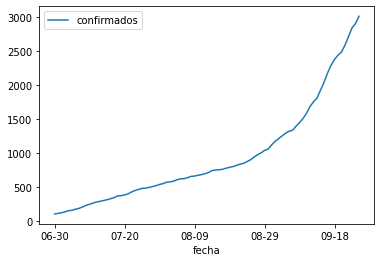

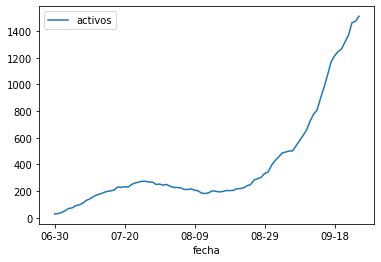

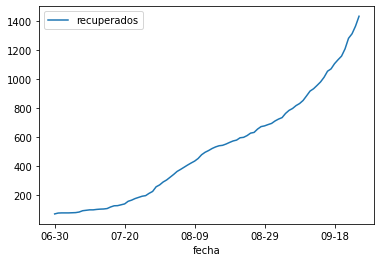

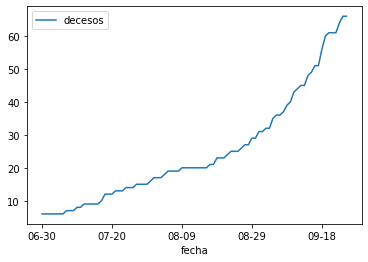

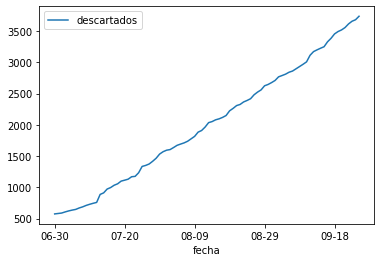

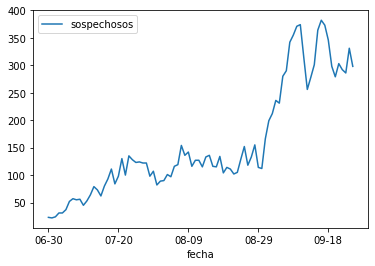

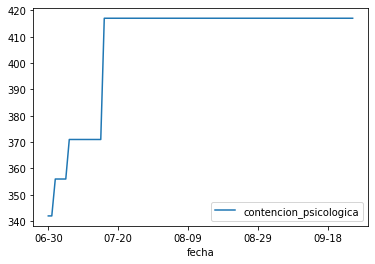

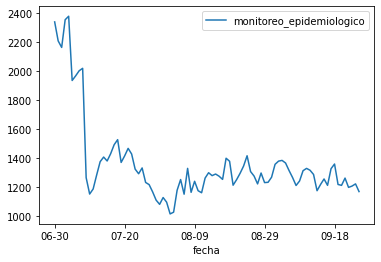

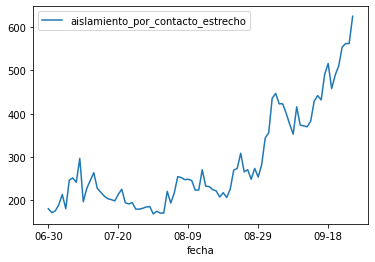

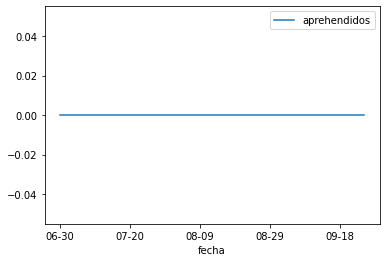

In [22]:
for i in  df_casos_covid.columns[1::]:
    df_casos_covid.plot(x=df_casos_covid.columns[0], y=i)
    plt.show()

**Los datos como confirmados, recuperados, decesos, etc. son acumulativos y otros como sospechosos no, para hacer una analisis conjunto de los datos deberíamos de igualar la formas de almacenamiento. Con los datos acumulatívos se podría realizar regresiones temporales para analizar el tiempo de duplicación de casos, predicciones, etc.** 

**Voy a llevar a todos los datos por día, haciendo la resta con los datos del día anterior para seguir con el analisis.**

In [23]:
nro = 0
for i in  df_casos_covid.columns:
    print(str(nro) + " " + i)
    nro = nro + 1
    
print(df_casos_covid.index)

0 fecha
1 confirmados
2 activos
3 recuperados
4 decesos
5 descartados
6 sospechosos
7 contencion_psicologica
8 monitoreo_epidemiologico
9 aislamiento_por_contacto_estrecho
10 aprehendidos
RangeIndex(start=0, stop=88, step=1)


In [24]:
#Voy a acomododar los datos para que no sean acumulativos para los campos
#confirmados, recuperados, decesos, descartados y contencion_psicologica
for i in range( 87 , 0, -1):
    df_casos_covid[df_casos_covid.columns[1]][i] -= df_casos_covid[df_casos_covid.columns[1]][i-1] 
    df_casos_covid[df_casos_covid.columns[3]][i] -= df_casos_covid[df_casos_covid.columns[3]][i-1] 
    df_casos_covid[df_casos_covid.columns[4]][i] -= df_casos_covid[df_casos_covid.columns[4]][i-1]
    df_casos_covid[df_casos_covid.columns[5]][i] -= df_casos_covid[df_casos_covid.columns[5]][i-1] 
    df_casos_covid[df_casos_covid.columns[7]][i] -= df_casos_covid[df_casos_covid.columns[7]][i-1] 

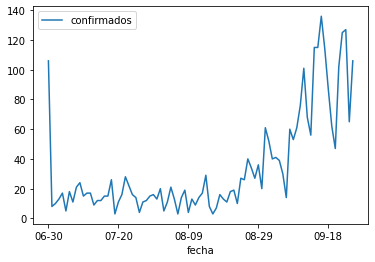

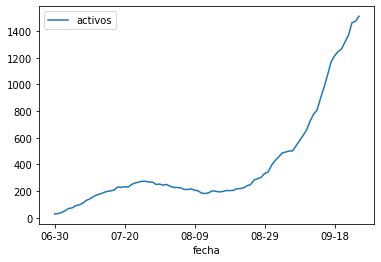

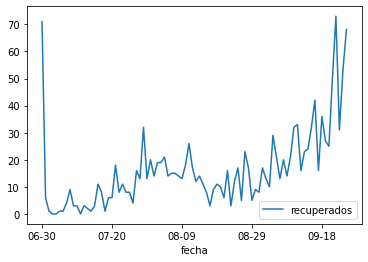

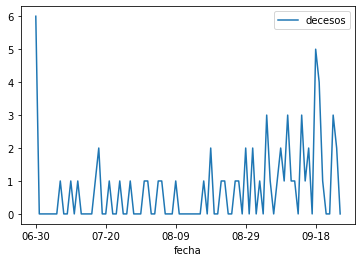

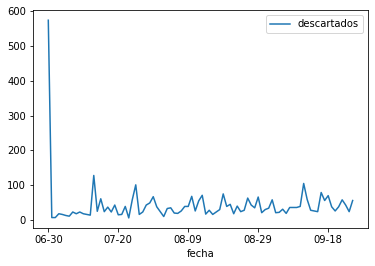

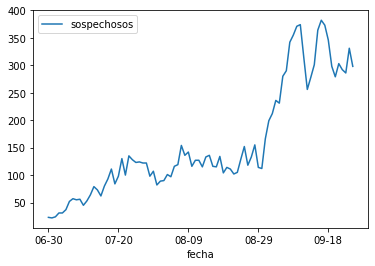

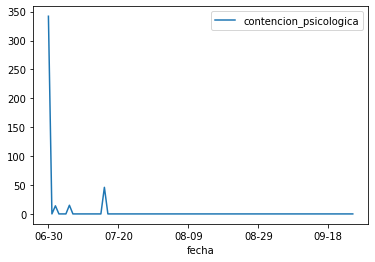

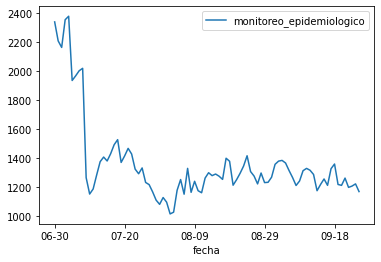

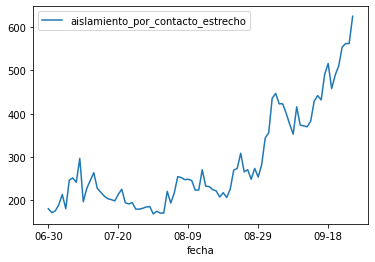

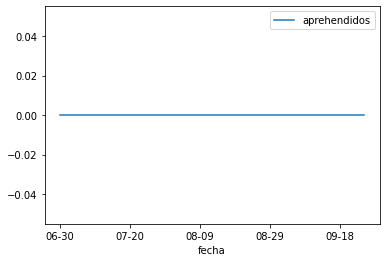

In [25]:
for i in  df_casos_covid.columns[1::]:
    df_casos_covid.plot(x=df_casos_covid.columns[0], y=i)
    plt.show()

Graficar la distribución de datos:

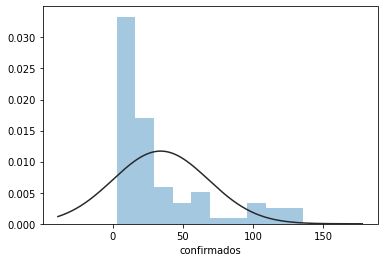

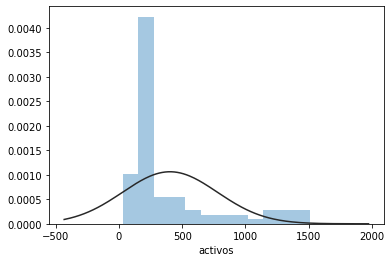

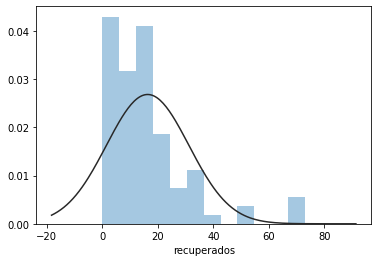

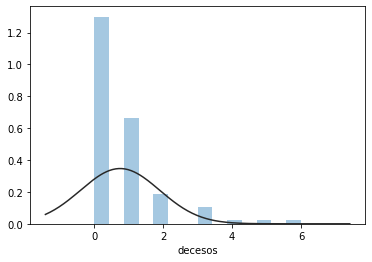

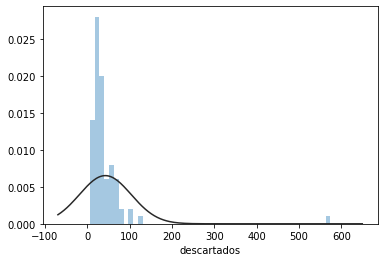

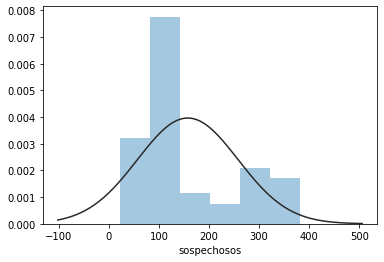

In [26]:
from scipy.stats import norm



#plt.figure(figsize=(8,6))
for i in  df_casos_covid.columns[1:7]:
        sns.distplot(df_casos_covid[i], fit=norm ,kde=False)
        plt.show()

#sns.pairplot(df_housing, diag_kind="kde")

**Se observa que las fechas comienzan en junio, habría que eliminar los outliers que genera ese comienzo al llevar los datos a no acumulativos**

**Se podría pensar en realizar algun tipo de promedio con los datos para eliminar la gran variación que poseen los datos debido a las altas y  bajas por la semana y los fines de semana**

**En la gran mayoria de los casos se observa que los datos no tienen una distribución normal, pero si en algunos casos se podría pensar que dos distribuciones normales podrían representar la distribución de los datos que se observan dos momentos en el analisis de los datos, hasta fines de agosto y a partir de ahí con el disparado de los casos**

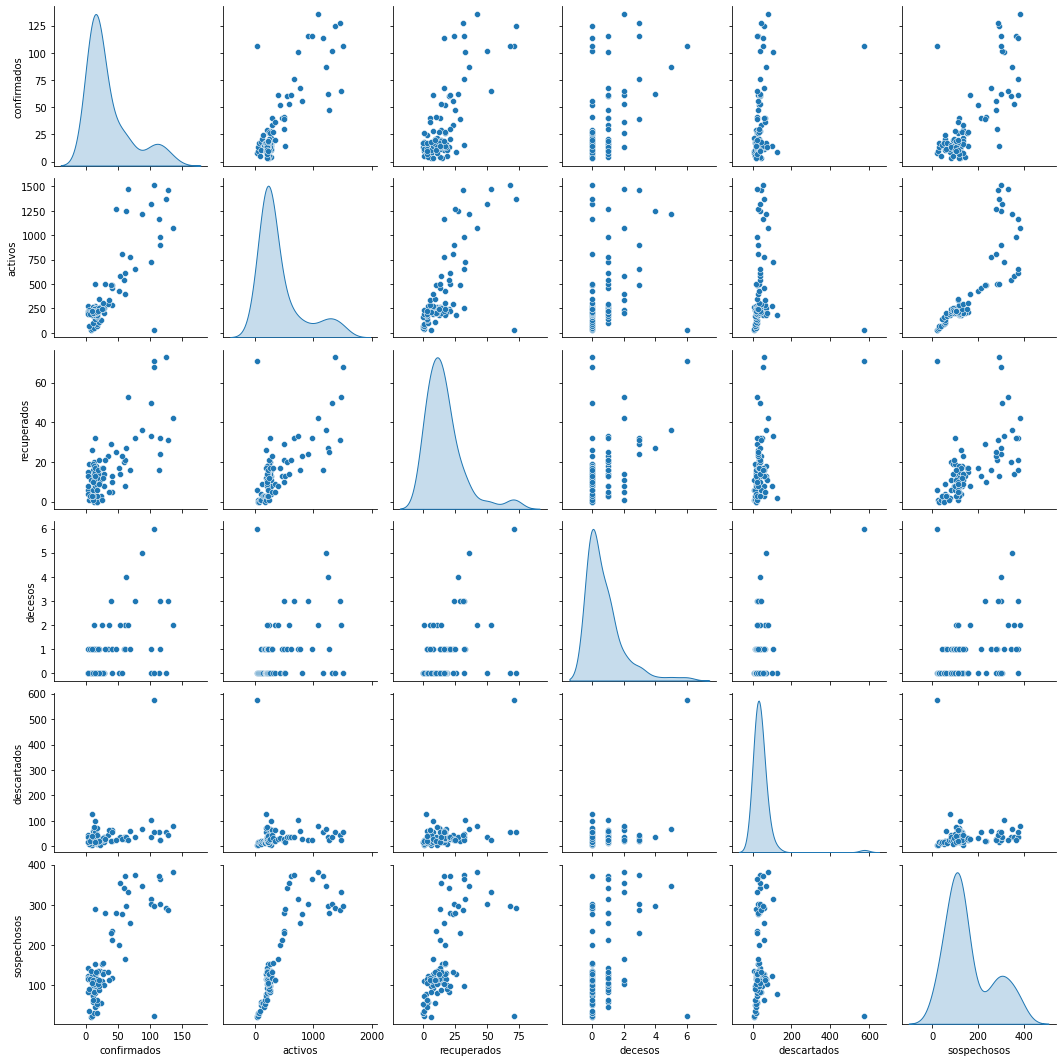

In [28]:
cols = ['confirmados', 'activos', 'recuperados', 'decesos', 'descartados', 'sospechosos']
sns.pairplot(df_casos_covid[cols], diag_kind="kde")

# Base de datos camas

In [29]:
df_camas_covid = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv')
df_camas_covid.describe()

,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,70.670455,817.500000,350.159091,40.920455,162.068182,19.647727,34.909091,32.795455,31.636364,8.170455,137.181818,24.284091,39.943182,8.386364,144.159091,5.170455,3.715909
std,42.113072,155.002113,77.216502,9.006028,18.349603,6.586367,21.706843,15.509107,1.598719,7.014307,26.004220,8.541917,27.322408,7.529912,4.535648,4.334363,0.453565
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,3.000000
25%,30.750000,848.000000,325.750000,38.000000,163.000000,15.750000,20.000000,22.000000,32.000000,3.000000,142.000000,20.000000,0.000000,0.000000,137.000000,3.000000,3.000000
50%,87.500000,848.000000,367.500000,43.000000,163.000000,18.000000,25.000000,26.500000,32.000000,4.500000,142.000000,25.000000,54.000000,7.500000,147.000000,4.000000,4.000000
75%,109.250000,848.000000,391.000000,46.000000,163.000000,23.000000,52.250000,44.250000,32.000000,13.250000,142.000000,28.000000,62.000000,14.000000,147.000000,6.000000,4.000000
max,131.000000,851.000000,450.000000,53.000000,177.000000,42.000000,86.000000,77.000000,33.000000,24.000000,143.000000,43.000000,72.000000,25.000000,147.000000,21.000000,4.000000


In [17]:
nro = 0
for i in  df_camas_covid.columns:
    print(str(nro) + " " + i)
    nro = nro + 1
    
print(df_camas_covid.index)

0 informeNumero
1 fecha
2 total_camas_hospitales
3 camas_ocupadas_hospitales
4 porcentaje_ocupacion_camas_hospitales
5 camas_covid
6 camas_sospechosos_covid
7 camas_confirmados_covid
8 porcentaje_ocupacion_camas_covid
9 uti_covid_totales
10 uti_covid_ocupadas
11 respiradores_totales
12 respiradores_ocupados
13 respiradores_covid_totales
14 respiradores_covid_ocupados
15 total_camas_ucma
16 total_camas_ocupadas_ucma
17 sedes_ucma
18 observaciones
RangeIndex(start=0, stop=88, step=1)


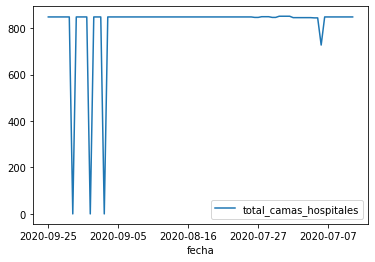

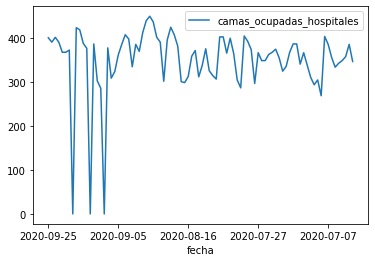

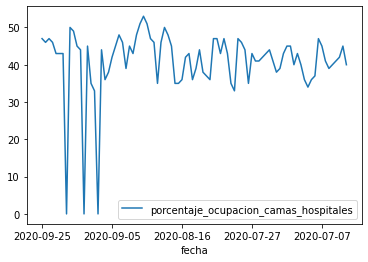

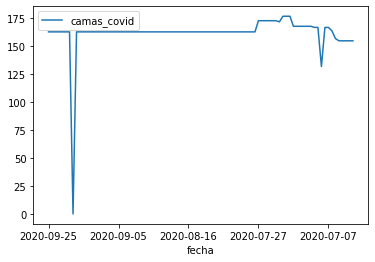

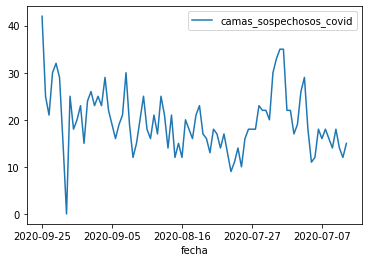

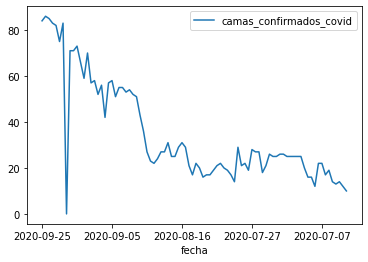

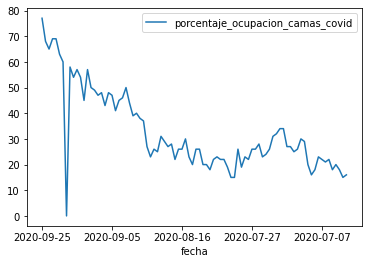

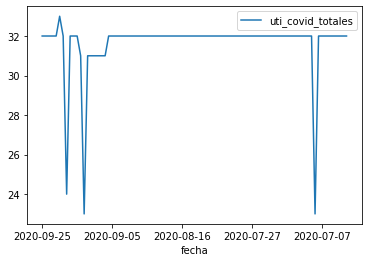

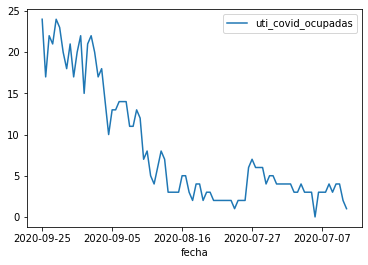

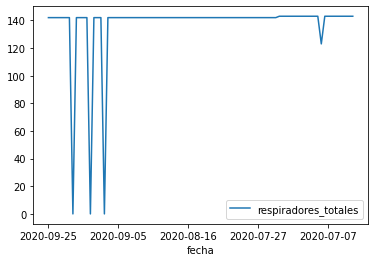

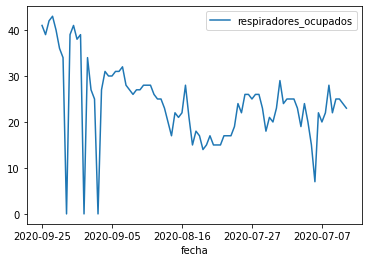

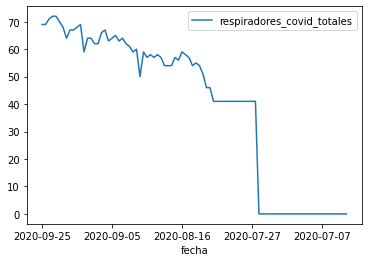

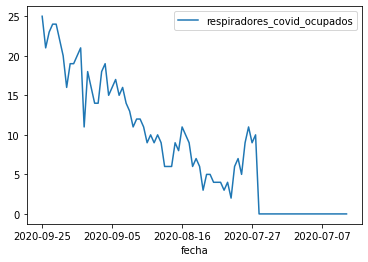

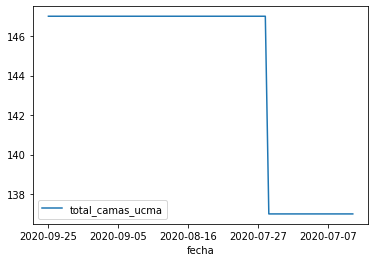

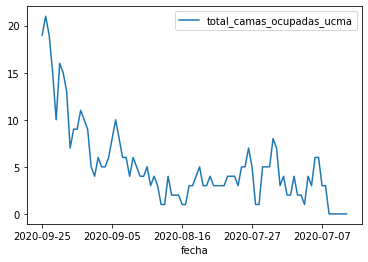

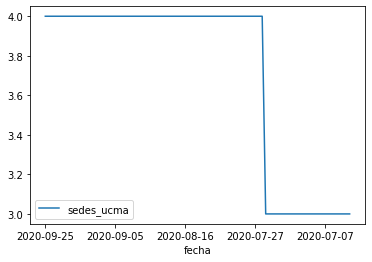

In [30]:
for i in  df_camas_covid.columns[2:-1]:
    df_camas_covid.plot(x=df_camas_covid.columns[1], y=i)
    plt.show()

** Tener en cuenta que las fechas están decrecientes si se quiere utilizar en conjunto con la otra base de datos y comienzan en julio no en junio**

**Se observan claron outliers que parecen errores de carga**

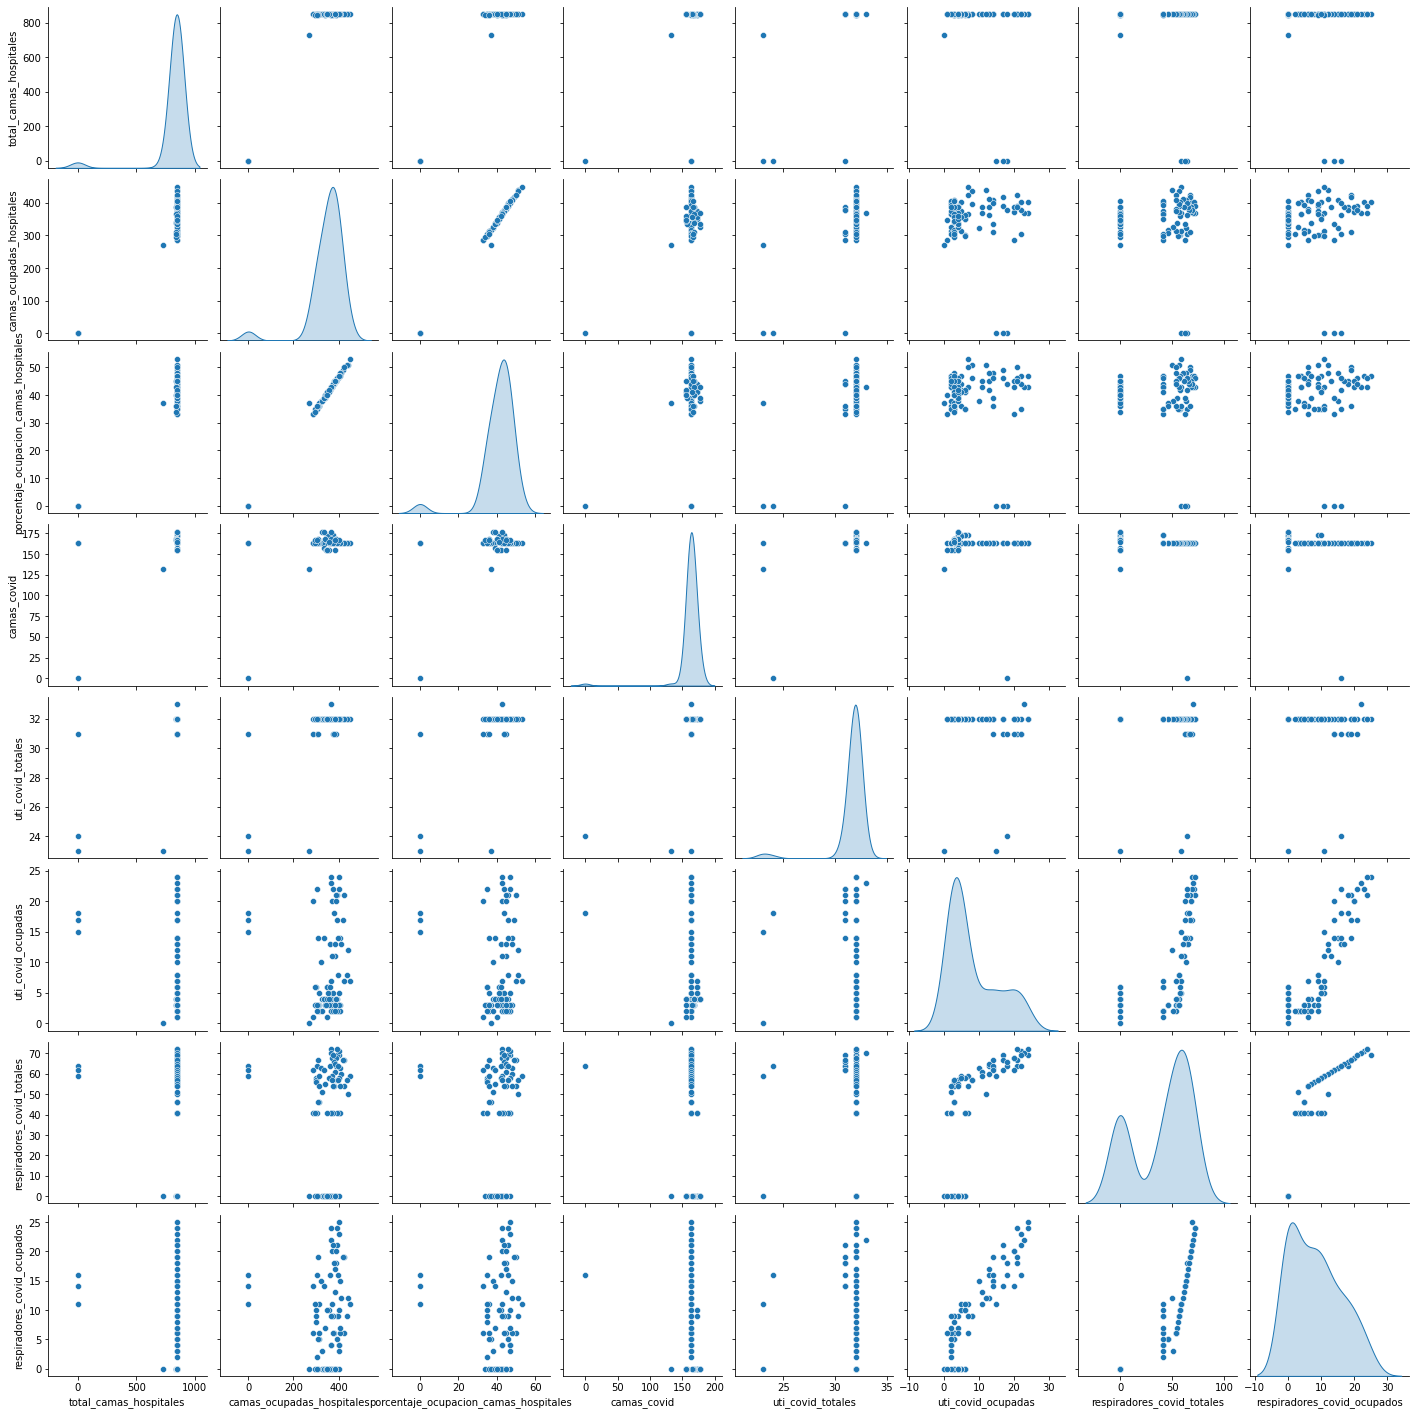

In [31]:
cols = ['total_camas_hospitales', 'camas_ocupadas_hospitales', 'porcentaje_ocupacion_camas_hospitales', 'camas_covid', 'uti_covid_totales', 'uti_covid_ocupadas', 'respiradores_covid_totales', 'respiradores_covid_ocupados']
sns.pairplot(df_camas_covid[cols], diag_kind="kde")